# Cryme Analysis

### Data

I've used a dataset from San Francisco public incidents.
https://data.sfgov.org/Public-Safety

I'm currently using all data from January 2012 until December 2014 both included.

### Findings in this study
##### 1. Crimes decrease at Christmas time, 25 December. (3.2 and 3.2.1)
##### 2. Criminals don't get up early (Crimes occur much more often in the afternoon than early in the morning) (3.4)

### Steps I've taken

* Load and import libraries


1. Load the data --> Dataset loading and quick data cleanup
2. Crime categories --> Histogram of crime categories
3. Crime over time --> Evolution of crime over time (day of week, over months and along the day)

### Future work

Theses are other possible ways of inspecting the dataset to get new insights.

* Find patterns using crime categories
* Use other open datasets to enhance the analysis
* Cluster analysis of crimes
* Find correlations between crime categories and dristricts

---

---
## 0. Libraries and configuration

In [279]:
%matplotlib inline

In [280]:
# I'll load all of them, just in case I need them ahead
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 7

---
## 1. Data load & quick inspection

### 1.1. Data load

I've used data from San Francisco database but instead of using the summer data only, I've downloaded it from 2012, 2013 and 2014.

Just looking at the dataset we can already see our first "problem". We can see that as this database states it represents "incidents", not just crimes. I'll get the distinct categories of incidents here and see which ones I'm really interested in.

As I have picked data from 3 different years I'll use a helper function to easily get the data from each year too.

In [281]:
data = pd.read_csv('sanfrancisco_incidents_12-14.csv', sep=",")

In [282]:
data.sample(3, random_state=0)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
280704,131027361,VEHICLE THEFT,STOLEN TRUCK,Tuesday,11/26/2013,09:00,RICHMOND,NONE,100 Block of EUCLID AV,-122.448481,37.784935,"(37.7849348262425, -122.448480677009)",13102736107025
185538,130334705,ASSAULT,THREATS AGAINST LIFE,Thursday,04/18/2013,15:25,MISSION,NONE,1200 Block of NOE ST,-122.431747,37.749425,"(37.7494248005842, -122.43174723)",13033470519057
361911,140505231,BURGLARY,"BURGLARY,STORE UNDER CONSTRUCTION, FORCIBLE ENTRY",Tuesday,06/17/2014,17:30,BAYVIEW,NONE,0 Block of PENNSYLVANIA AV,-122.393931,37.765455,"(37.765454941821, -122.393930986892)",14050523105151


### 1.2. Checking incident categories

In [283]:
categories = set(data.Category)
print ', '.join(categories)      # pretty print categories without using a line for each category

KIDNAPPING, WEAPON LAWS, SECONDARY CODES, WARRANTS, PROSTITUTION, EMBEZZLEMENT, SEX OFFENSES, NON FORCIBLE, LOITERING, FRAUD, DRIVING UNDER THE INFLUENCE, ROBBERY, BURGLARY, SUSPICIOUS OCC, OTHER OFFENSES, BRIBERY, FORGERY/COUNTERFEITING, BAD CHECKS, DRUNKENNESS, ARSON, GAMBLING, EXTORTION, SUICIDE, RECOVERED VEHICLE, SEX OFFENSES, FORCIBLE, DRUG/NARCOTIC, TRESPASS, LARCENY/THEFT, VANDALISM, NON-CRIMINAL, PORNOGRAPHY/OBSCENE MAT, LIQUOR LAWS, TREA, VEHICLE THEFT, STOLEN PROPERTY, ASSAULT, FAMILY OFFENSES, MISSING PERSON, DISORDERLY CONDUCT, RUNAWAY


As you can see above, *NON-CRIMINAL* incidents are not of our interest so I'll crop them from the dataset.

In [284]:
not_crimes = data[data.Category == "NON-CRIMINAL"]  # Not interested in this kind of issues
crimes = data[data.Category != "NON-CRIMINAL"]      # All kinds of criminal activity

### 1.3. Helper functions and useful variables

I'll make some  helper functions to select and inspect the data easier. I'll use them later to map some data and group it.

In [285]:
# -----------------------------------
#  Date and time mapping functions
# -----------------------------------

def get_year(date):
    month, day, year = date.split('/')
    return year

def get_month(date):
    month, day, year = date.split('/')
    return month

def get_day(date):
    month, day, year = date.split('/')
    return day

def get_month_and_day(date):
    month, day, year = date.split('/')
    return month+'/'+day

def get_hour(hours):
    hour, minutes = hours.split(':')
    return hour

def crimes_in_year(data, year):
    return data[data.Date.map(get_year) == str(year)]

# -----------------------------------
#  Aggregation functions
# -----------------------------------

def count_and_sort(data):
    return data.value_counts().sort_index()


In [286]:
# -----------------------------------
#  Useful variables
# -----------------------------------

# An independent variable for each year
crimes_2012 = crimes_in_year(crimes, 2012)
crimes_2013 = crimes_in_year(crimes, 2013)
crimes_2014 = crimes_in_year(crimes, 2014)

# An array of crimes for each year
years_of_crime = [crimes_in_year(crimes, x) for x in [2012, 2013, 2014]]

---
## 2. Crimes per category

Let's make a quick inspection of the data categories we have. 
I'll plot a histogram of the different categories.

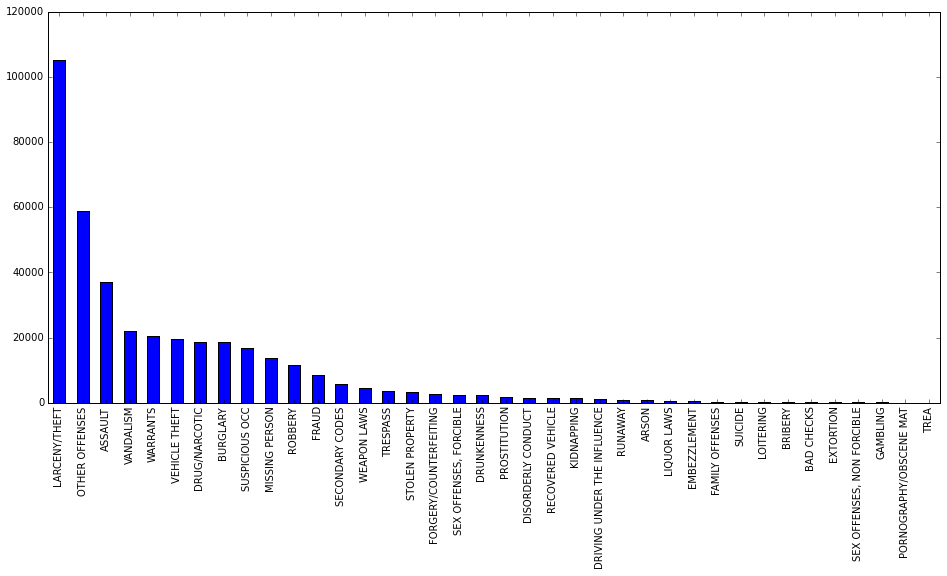

In [287]:
p = crimes.Category.value_counts().plot(kind='bar')

---
## 3. Crimes over time

### 3.0. Plot the number of crimes per year

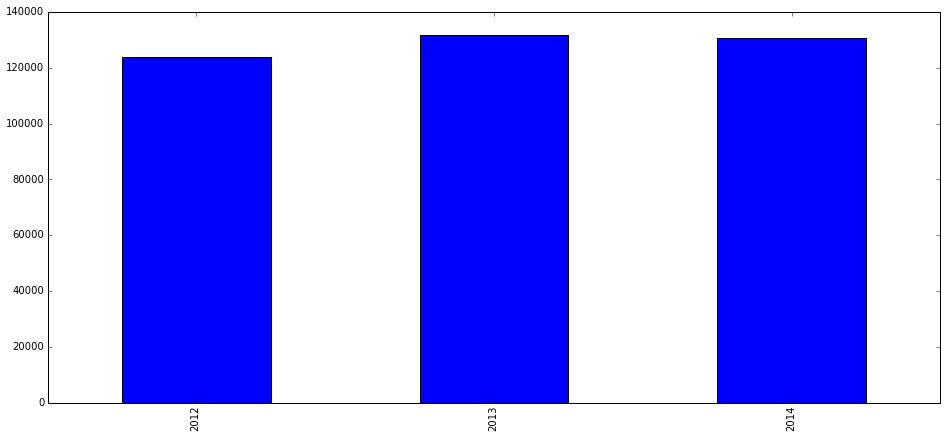

In [288]:
p = crimes.Date.map(get_year).value_counts().sort_index().plot(kind='bar')

Every year has approximately the same number of crimes, so there is nothing weird here.

### 3.1. Crimes per week day (histogram)

Now I'll try to find insights, lets plot the distribution of crimes per day of week

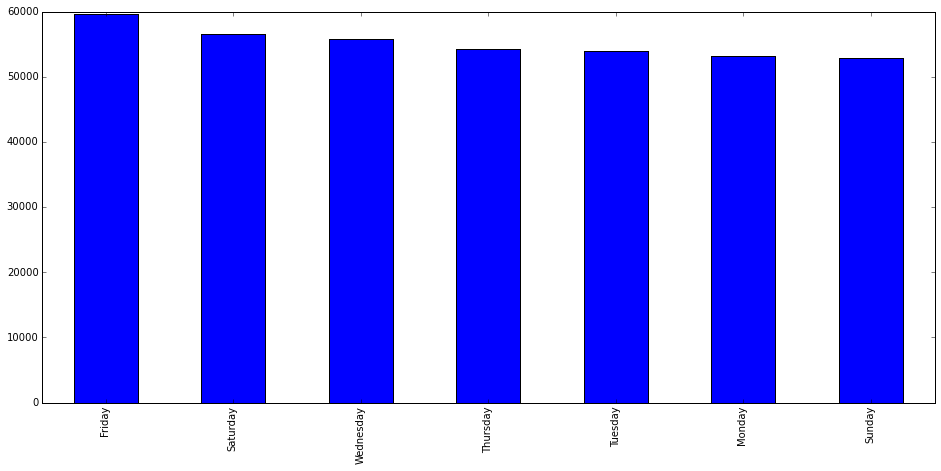

In [289]:
p = crimes.DayOfWeek.value_counts().plot(kind="bar")

Looks like there is nothing interesting here. Weekends have slightly more crime records than other days but
1. That is something to be expected.
2. The variation in number of crimes is not meaningful.

### 3.2. Crimes per day over year

Lets plot the number of crimes over the course of the year.
For this purpose I'll create some helper functions to inspect the data easier later on.

In [290]:
def value_counts_over_day(data):
    '''
    Returns the aggregated number of ocurrences per day
    '''
    return data.Date.map(get_month_and_day).value_counts().sort_index()

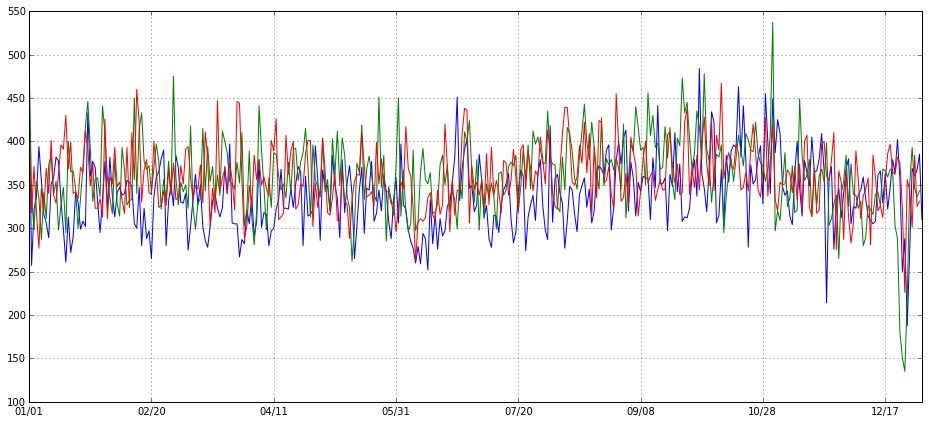

In [291]:
for year in years_of_crime:
    value_counts_over_day(year).plot(grid=True)

### 3.2.1. Christmas time

We can clearly see a prominent trough right in December around Christmas time.

Lets plot only the month of December to look at that more closely.

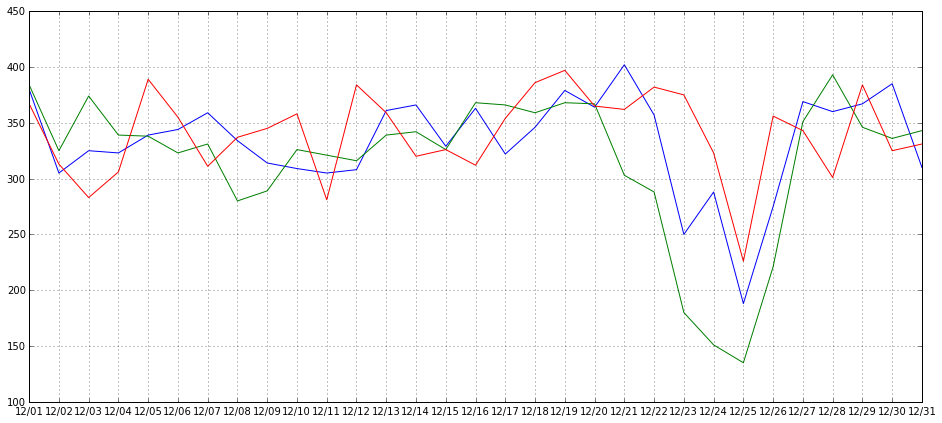

In [292]:
for year in years_of_crime:
    value_counts_over_day(year[year.Date.map(get_month) == '12']).plot(grid=True, xticks=range(31))

This can have two different explanations:

* Criminals are less active in Christmas
* There are less crimes just because people tend to stay with their family at home so there are less opportunities for thefts to get anything from them.


Apart from the christmas finding we can't see any global trending here, I may need to aggregate the data to get some insights here.

### 3.3. Crimes per month

Now lets aggregate the crimes over month to get a more consistent output.

In [293]:
def values_counts_over_month(data):
    '''
    Returns the aggregated number of ocurrences per month
    '''
    return data.Date.map(get_month).value_counts().sort_index() 

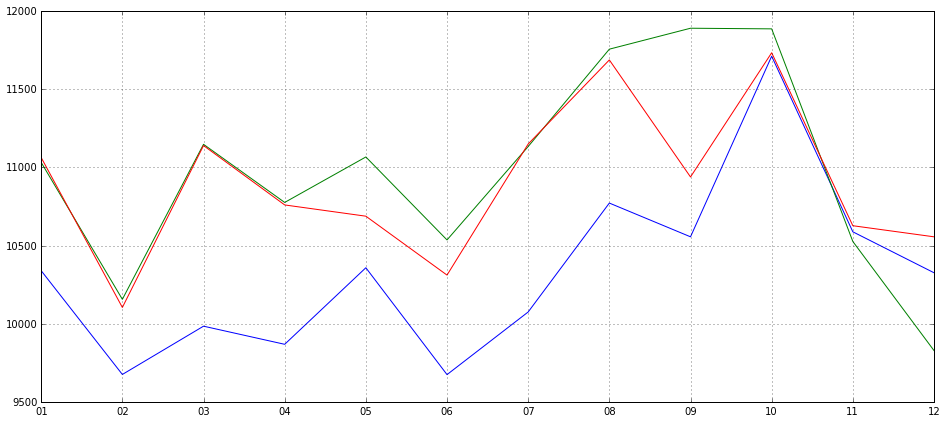

In [294]:
for year in years_of_crime:
    values_counts_over_month(year).plot(grid=True, xticks=range(12))

We may have found something here. 


* There is a difference of roughly +18% crimes in October(max) in comparison with Frebruary(min)
* In December crimes are much less often than their surrounding months (maybe because of christmas time)
* For some reason february is clearly the month with less crimes.

In [295]:
crimes_month = values_counts_over_month(crimes).values
(max(crimes_month) - min(crimes_month)) / float(min(crimes_month))

0.18032403541005512

### 3.4. Crimes per hour (over the course of day)

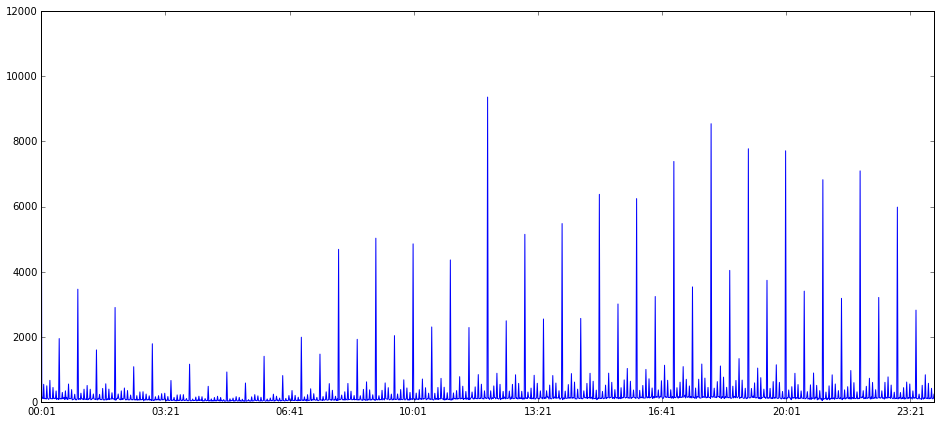

In [296]:
p = crimes.Time.value_counts().sort_index().plot()

As we can see here this plot is actually not strictly real-time. That is the reason we are seeing those high peaks. Probably most reports are created with X:00 minutes o'clock. It has a lot of peaks and troughs because I used the raw data without aggregation. Let's try it with aggregation and plotting each year independently to see if there is actually a trend here.

Lets plot now this data for each year independently:

In [297]:
def value_counts_per_hour(data):
    '''
    Returns the aggregated number of ocurrences per hour
    '''
    return data.Time.map(get_hour).value_counts().sort_index()

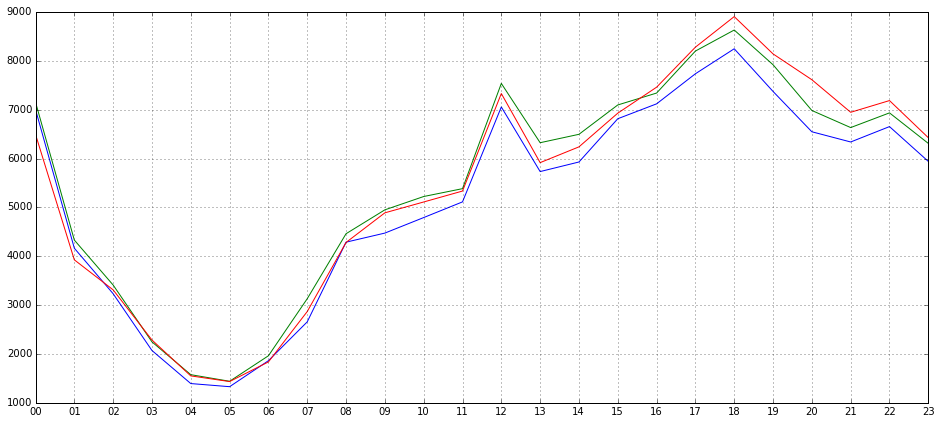

In [298]:
for year in years_of_crime:
    value_counts_per_hour(year).plot(grid=True, xticks=range(24))

We can definitely see a trend in this plot.

1. During night time, there is up to 1/9th the criminal activity than in the afternoon. This is expected because most people are sleeping during these hours.
2. We can see 2 prominent peaks, one between 12-13h and another one 18-19h. There is another slightly marked peak between 22-23h.